# Intro to TensorFlow for Deep Learning - Notes

Source code, video explanations and original material can be found here: [Intro to TensorFlow for Deep Learning](https://classroom.udacity.com/courses/ud187)

In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import numpy as np

In [ ]:
import math

In [ ]:
import matplotlib.pyplot as plt

## Concepts Recap

* Features: Input values for model
* Labels: Output values for model
* Examples: Pair of input and output values for training
* Layer: Collection of interconnected nodes within a network
* Model: Representation of neural network
* Dense and fully connected network: Each node in a layer is connected to every note in the previous layer
* Weights and biases: Weights are the variable dependant values, and biases are independent.
* Loss: Difference between predicted and expected output
* MSE: Mean squared loss, a loss function that squares and makes more evident losses more negative
* Gradient descent: Algorithm to follow a gradient to descent loss function to desired output
* Optimizer: Implementation of Gradient descent algorithm (Adam optimizer -> ADAptative with Momentum - Common optimizer for gradient descent)
* Learning rate: Gradient step rate
* Batch: Set of examples
* Epoch: Full pass on training dataset
* Backpropagation: Internal variable adjustment by optimizer starting from output layer to input layer

## Quick Keras Implementation and Explanation

In [ ]:
# Numpy arrays for defining training data
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [ ]:
# Creating one dense layer, from keras.layers, with one node unit, shaped to an input array with one feature
layer_0 = tf.keras.layers.Dense(units=1, input_shape=[1])

# Inserting layer_0 into keras.Sequential model
# keras.Sequential, from keras.io => Sequential groups a linear stack of layers into a tf.keras.Model
model = tf.keras.Sequential([l0]) 

The following line produces the same result, and is more commonly used if the number of layers is neither dynamic nor too large, which sets the layer values inside `Sequential` function

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])               
])

Before training keras.Model, the model has to be compiled, given a loss and specific optimizer functions

ADAM -> https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Now, for training the model, the `.fit` function from `keras.Model` should be used.

In [ ]:
# Trains the model for a fixed number of epochs (iterations on a dataset),
# and saves output to history variable, for viewing model performance over epochs
history = model.fit(x=celsius_q, y=fahrenheit_a, epochs=500, verbose=False)

After fitting parameters, model performance can be displayed as follows:

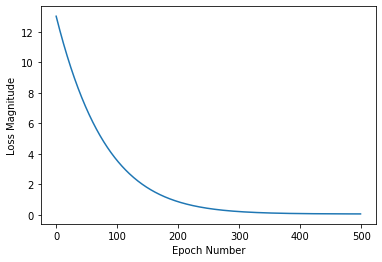

In [ ]:
import matplotlib.pyplot as plt

# X axis corresponds to specific Epoch number,
# and Y axis corresponds to Loss value for the model prediction at that specific Epoch
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [ ]:
# Using fitted model for predicting random test input
print(model.predict([100.0]))

[[211.73962]]


## Fashion MNIST - Dataset for Image Labeling Training

In [ ]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 4.0 MB 4.1 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [ ]:
# Defining and seting dataset values from imported TensorFlow prepackaged dataset library
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Objective: Label a 28x28 pixels gray-scale image with one out of 10 possible labels.

Classifying deep neural network **features, labels and layers**:

* **Features**: 28x28 pixels = `array[ 784 ]`, with 1-byte values (gray-scale).

(The process of transforming a 2D matrix into an 1D array is called **flattening**).

* **Layers**: Each one of the 784 inputs will be fully connected to the first dense layer, which will contain 128 nodes.

In [ ]:
layer_0 = tf.keras.layers.Flatten(input_shape=(28, 28, 1)) #28x28, with 1-byte grayscale

In [ ]:
layer_1 = tf.keras.layers.Dense(units=128, activation=tf.nn.relu) #ReLU stands for Rectified Linear Unit, and represents a specific mathematical activation function

ReLU: ReLU is helpful with **capturing the effect of interactions** between variables in non-linear and linear functions - 

For example, if X = Y, and Z = X, **the interaction between X and Y** (X = Y) **affects the prediction** of the Z value.

https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning

* **Labels**: [t-shirt, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, anklee boot]

Since the model is a mathematical function and thus only returns numbers, for determining the prediction as a value out of one of these labels, the model should return a probability of confidence, defining which of these labels it is most confident characterises the input values.

For this, the output should be a distribution of probabilities (all outputs sum up to 1)

This can be achieved using the **softmax function** (always present in classification using distribution of probabilities)

The model is trained using the `train_dataset` values, and its accuraccy is tested using the `test_dataset` values

In [ ]:
# The obtained label values array (classes) from the pre-packaged dataset is defined below:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
# Defining output layer with softmax activation
layer_2 = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)

### Preprocessing

Preprocessing is an important step before laying a model out, as to have an overall vision of the dataset, to make the input data acceptable and less time consuming to iterate through, as well as being the most significant step when deciding on how to design the model.

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [ ]:
# Normalizing gray-scale image, with gray values ranging [0-255] to 
# be converted to an array with values [0-1]
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [ ]:
# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [ ]:
# Cache dataset for loading from memory and not from disk
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

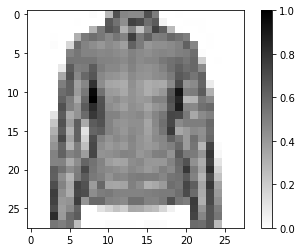

In [ ]:
# Visualizing a specific plotted example from the dataset
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

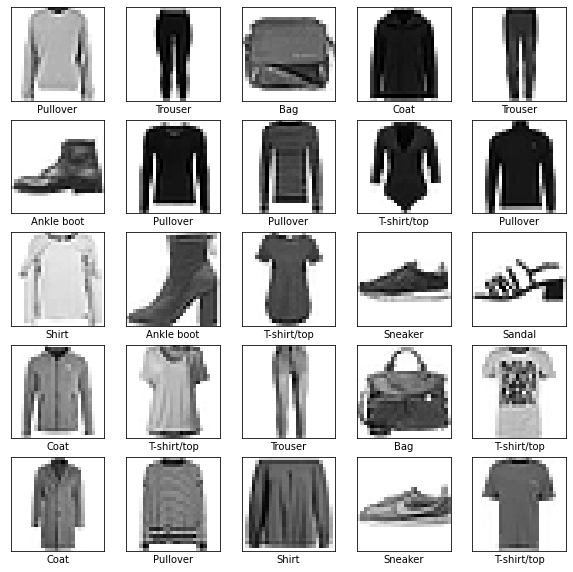

In [ ]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    layer_0,
    layer_1,
    layer_2
])

In [ ]:
# Now for compiling model, the loss function should perform the same as the MSE
# function, but account for multiple outputs as a probability distribution
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32

# Shuffling is useful for removing any order relationships that the model 
# might infer on the dataset
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [ ]:
train_dataset

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 10s 2ms/step - loss: 0.4977 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3771 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3274 - accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3099 - accuracy: 0.8867
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8895
